In [1]:
import pandas as pd
names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']
df = pd.read_csv('iris.data', names=names)

In [2]:
print("Linhas: %d, Colunas: %d" % (len(df), len(df.columns)))

Linhas: 150, Colunas: 5


In [3]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Class, dtype: int64

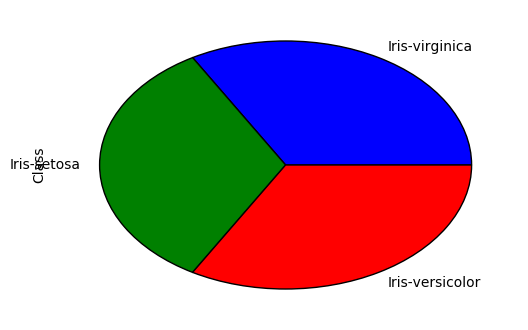

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df['Class'].value_counts().plot(kind='pie');

In [7]:
# Como temos largura e comprimento, podemos criar uma feature de area
df['SepalArea'] = df['SepalLength'] * df['SepalWidth']
df['PetalArea'] = df['PetalLength'] * df['PetalWidth']

# Vamos tirar a media de cada feature e criar uma feature boleana
# que marca linha por linha se esses valores estao acima da media.
df['SepalLengthAboveMean'] = df['SepalLength'] > df['SepalLength'].mean()
df['SepalWidthAboveMean'] = df['SepalWidth'] > df['SepalWidth'].mean()

df['PetalLengthAboveMean'] = df['PetalLength'] > df['PetalLength'].mean()
df['PetalWidthAboveMean'] = df['PetalWidth'] > df['PetalWidth'].mean()

In [8]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,SepalArea,PetalArea,SepalLengthAboveMean,SepalWidthAboveMean,PetalLengthAboveMean,PetalWidthAboveMean
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28,False,True,False,False
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28,False,False,False,False
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26,False,True,False,False
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30,False,True,False,False
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28,False,True,False,False


In [9]:
features = df.columns.difference(['Class'])

X = df[features].values
y = df['Class'].values

In [10]:
# Iris-setosa
sample1 = [1.0, 2.0, 3.5, 1.0, 10.0, 3.5, False, False, False, False]
# Iris-versicolor
sample2 = [5.0, 3.5, 1.3, 0.2, 17.8, 0.2, False, True, False, False]
# Iris-virginica
sample3 = [7.9, 5.0, 2.0, 1.8, 19.7, 9.1, True, False, True, True]

In [11]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state=1986, criterion='gini', max_depth=3)
classifier_dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1986, splitter='best')

In [12]:
classifier_dt.predict([sample1, sample2, sample3])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
from sklearn.cross_validation import cross_val_score

scores_dt = cross_val_score(classifier_dt, X, y, scoring='accuracy', cv=5)
print(scores_dt.mean())

0.953333333333


In [17]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=1986, criterion='gini', max_depth=10, n_estimators=50, n_jobs=-1)
scores_rf = cross_val_score(classifier_rf, X, y, scoring='accuracy', cv=5)

print(scores_rf.mean())

0.96


In [23]:
classifier_dt.fit(X, y)  # Treinando com tudo

features_importance_dt = zip(classifier_dt.feature_importances_, features)
for importance, feature in sorted(features_importance_dt, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

PetalArea: 100.000000%
SepalWidthAboveMean: 0.000000%
SepalWidth: 0.000000%
SepalLengthAboveMean: 0.000000%
SepalLength: 0.000000%
SepalArea: 0.000000%
PetalWidthAboveMean: 0.000000%
PetalWidth: 0.000000%
PetalLengthAboveMean: 0.000000%
PetalLength: 0.000000%


In [22]:
classifier_rf.fit(X, y)

features_importance_rf = zip(classifier_rf.feature_importances_, features)
for importance, feature in sorted(features_importance_rf, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

PetalArea: 31.999611%
PetalWidth: 28.825871%
PetalLength: 21.523382%
PetalLengthAboveMean: 7.121078%
SepalLength: 3.085491%
SepalArea: 2.714643%
SepalWidth: 2.038964%
PetalWidthAboveMean: 1.668686%
SepalLengthAboveMean: 0.864057%
SepalWidthAboveMean: 0.158217%
